In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from scipy.stats import randint

In [3]:
df = pd.read_csv("metro_train.csv")

In [5]:
print("The dataset has", df.shape[0], "rows and", df.shape[1], "columns.")

The dataset has 1516948 rows and 17 columns.


In [6]:
print("The columns and their data types are:") 
print(df.dtypes)

The columns and their data types are:
Unnamed: 0           int64
timestamp           object
TP2                float64
TP3                float64
H1                 float64
DV_pressure        float64
Reservoirs         float64
Oil_temperature    float64
Motor_current      float64
COMP               float64
DV_eletric         float64
Towers             float64
MPG                float64
LPS                float64
Pressure_switch    float64
Oil_level          float64
Caudal_impulses    float64
dtype: object


In [4]:
#remove first column from df
df = df.iloc[:,1:]

In [5]:

print("The number of null values in each column are:") 
print(df.isnull().sum())

The number of null values in each column are:
timestamp          0
TP2                0
TP3                0
H1                 0
DV_pressure        0
Reservoirs         0
Oil_temperature    0
Motor_current      0
COMP               0
DV_eletric         0
Towers             0
MPG                0
LPS                0
Pressure_switch    0
Oil_level          0
Caudal_impulses    0
dtype: int64


In [9]:
print("The summary of each column is:") 
print(df.describe())

The summary of each column is:
                TP2           TP3            H1   DV_pressure    Reservoirs  \
count  1.516948e+06  1.516948e+06  1.516948e+06  1.516948e+06  1.516948e+06   
mean   1.367826e+00  8.984611e+00  7.568155e+00  5.595619e-02  8.985233e+00   
std    3.250930e+00  6.390951e-01  3.333200e+00  3.824015e-01  6.383070e-01   
min   -3.200000e-02  7.300000e-01 -3.600000e-02 -3.200000e-02  7.120000e-01   
25%   -1.400000e-02  8.492000e+00  8.254000e+00 -2.200000e-02  8.494000e+00   
50%   -1.200000e-02  8.960000e+00  8.784000e+00 -2.000000e-02  8.960000e+00   
75%   -1.000000e-02  9.492000e+00  9.374000e+00 -1.800000e-02  9.492000e+00   
max    1.067600e+01  1.030200e+01  1.028800e+01  9.844000e+00  1.030000e+01   

       Oil_temperature  Motor_current          COMP    DV_eletric  \
count     1.516948e+06   1.516948e+06  1.516948e+06  1.516948e+06   
mean      6.264418e+01   2.050171e+00  8.369568e-01  1.606106e-01   
std       6.516261e+00   2.302053e+00  3.694052e-0

In [10]:
print("The correlation matrix of the dataset is:") 
print(df.corr())

The correlation matrix of the dataset is:


C:\Users\nawal\AppData\Local\Temp\ipykernel_12364\1365453726.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


                      TP2       TP3        H1  DV_pressure  Reservoirs  \
TP2              1.000000 -0.011161 -0.961269     0.415025   -0.012403   
TP3             -0.011161  1.000000  0.224867    -0.153074    0.999993   
H1              -0.961269  0.224867  1.000000    -0.425513    0.226037   
DV_pressure      0.415025 -0.153074 -0.425513     1.000000   -0.153080   
Reservoirs      -0.012403  0.999993  0.226037    -0.153080    1.000000   
Oil_temperature  0.250710  0.401616 -0.161810     0.339697    0.401647   
Motor_current    0.697480  0.413756 -0.600178     0.302160    0.412691   
COMP            -0.955521  0.103295  0.971419    -0.423992    0.104509   
DV_eletric       0.947396 -0.078428 -0.958663     0.427813   -0.079640   
Towers          -0.616405  0.064937  0.628964    -0.285256    0.065729   
MPG             -0.941250  0.088343  0.954307    -0.417284    0.089555   
LPS              0.057651 -0.324556 -0.133178     0.011928   -0.325235   
Pressure_switch -0.069532  0.025240  0

In [11]:
sns.set_style("whitegrid") 
plt.rcParams["figure.figsize"] = (10, 6)

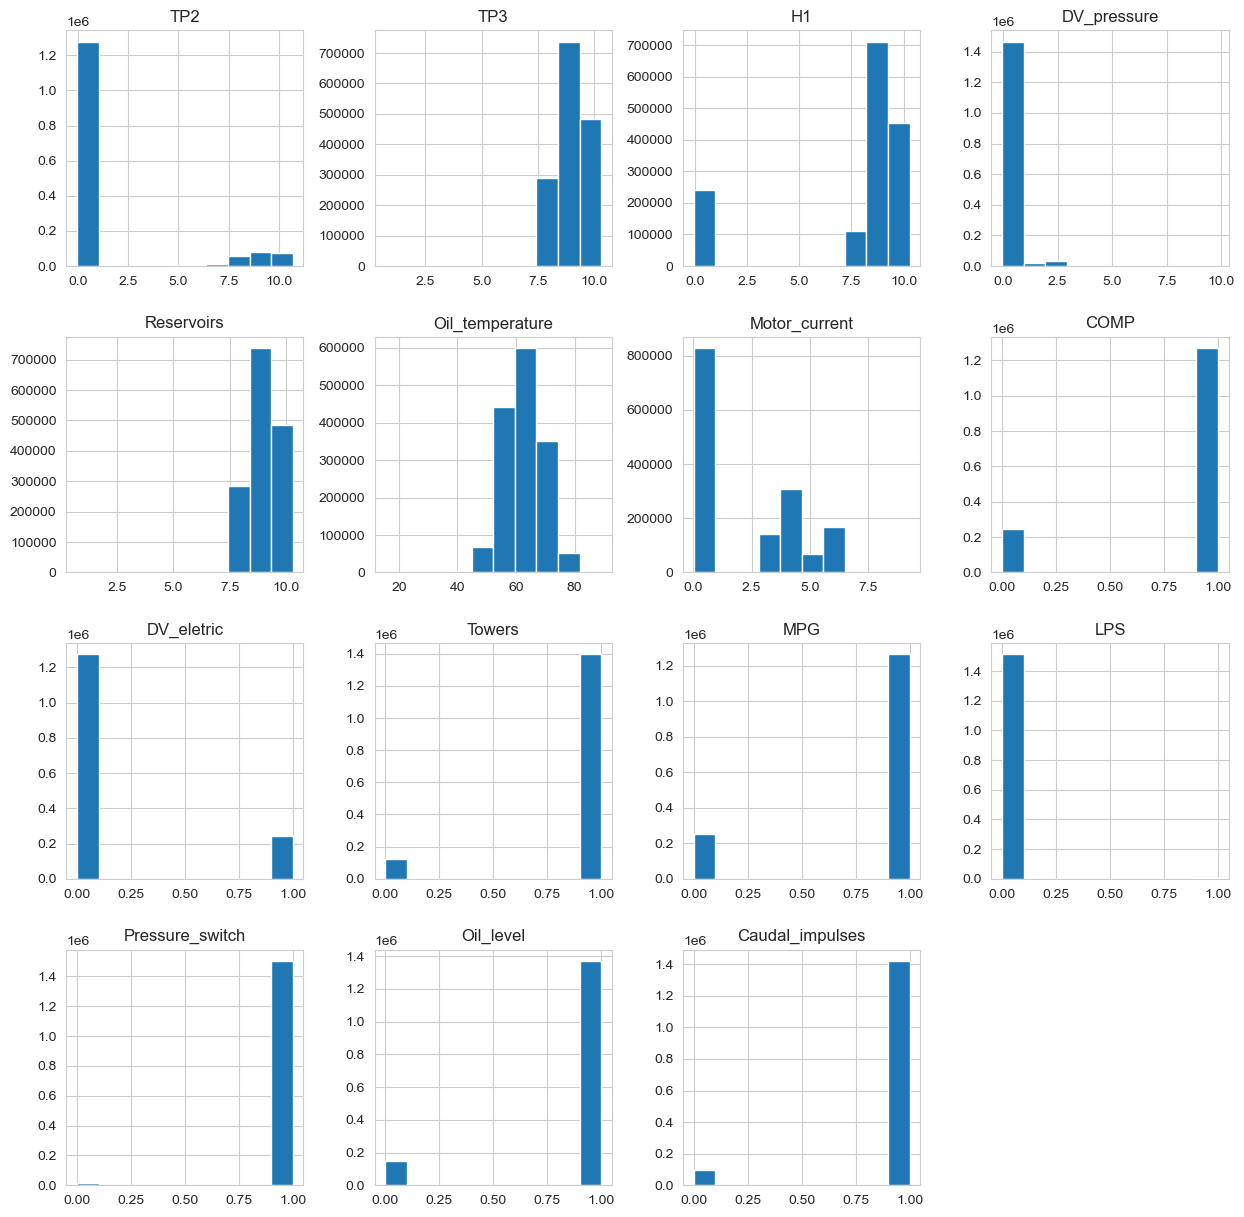

In [12]:
df.hist(figsize=(15, 15))
plt.show()

C:\Users\nawal\AppData\Local\Temp\ipykernel_12808\638011.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


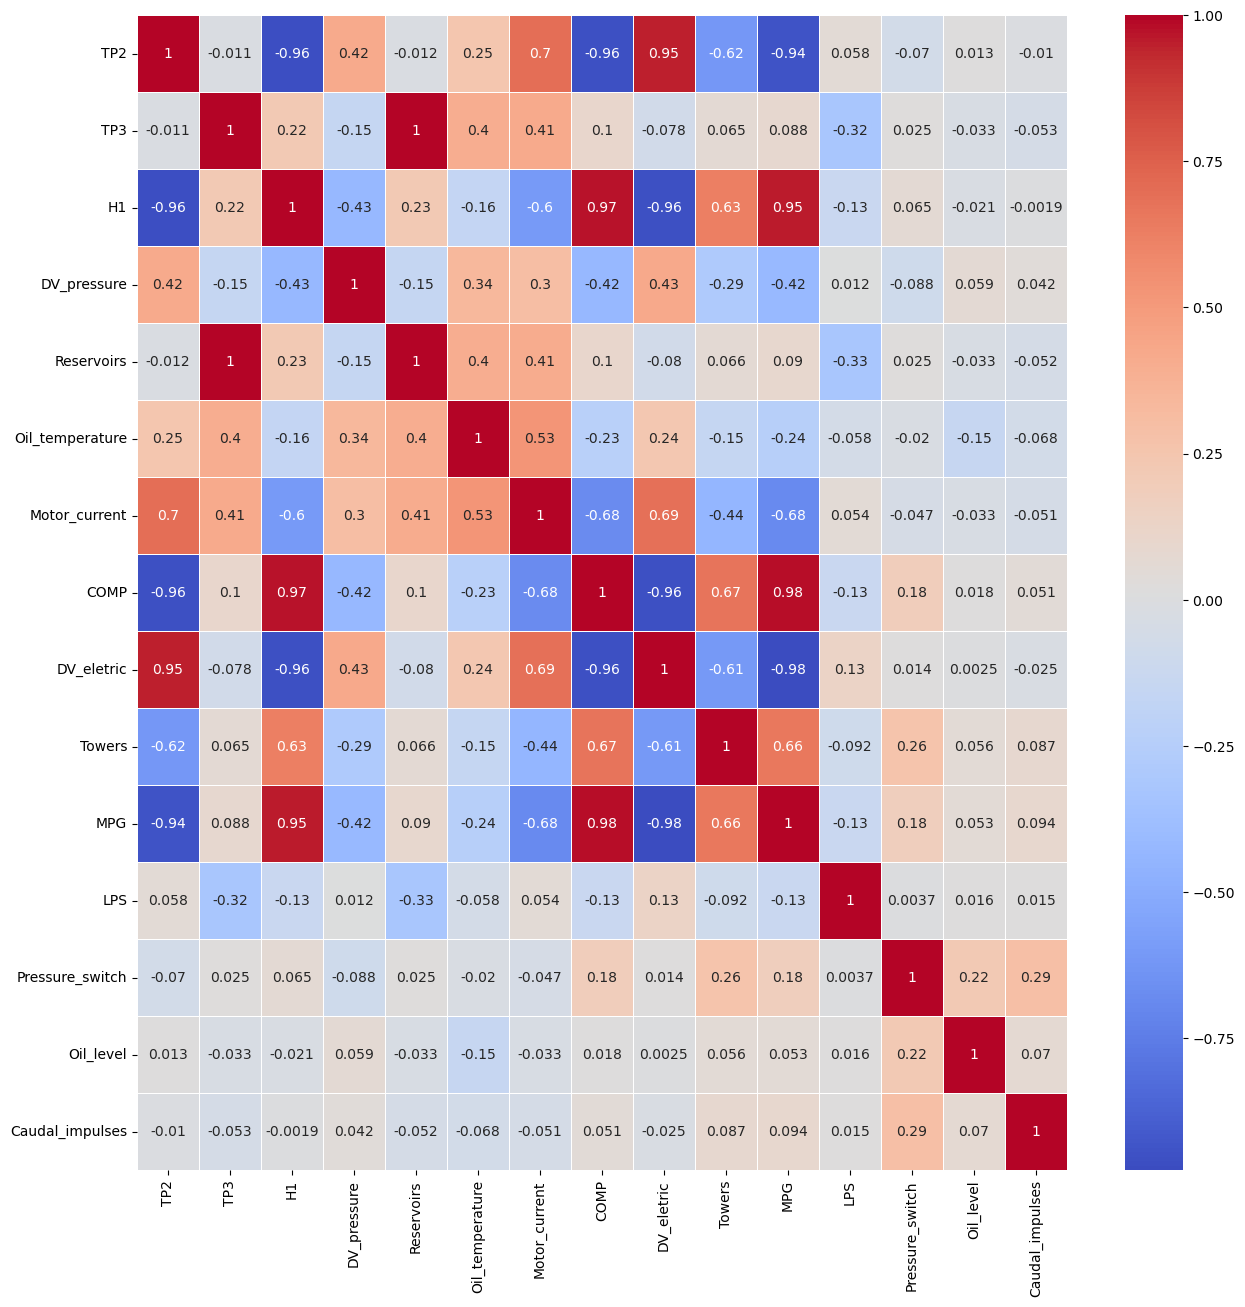

In [6]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

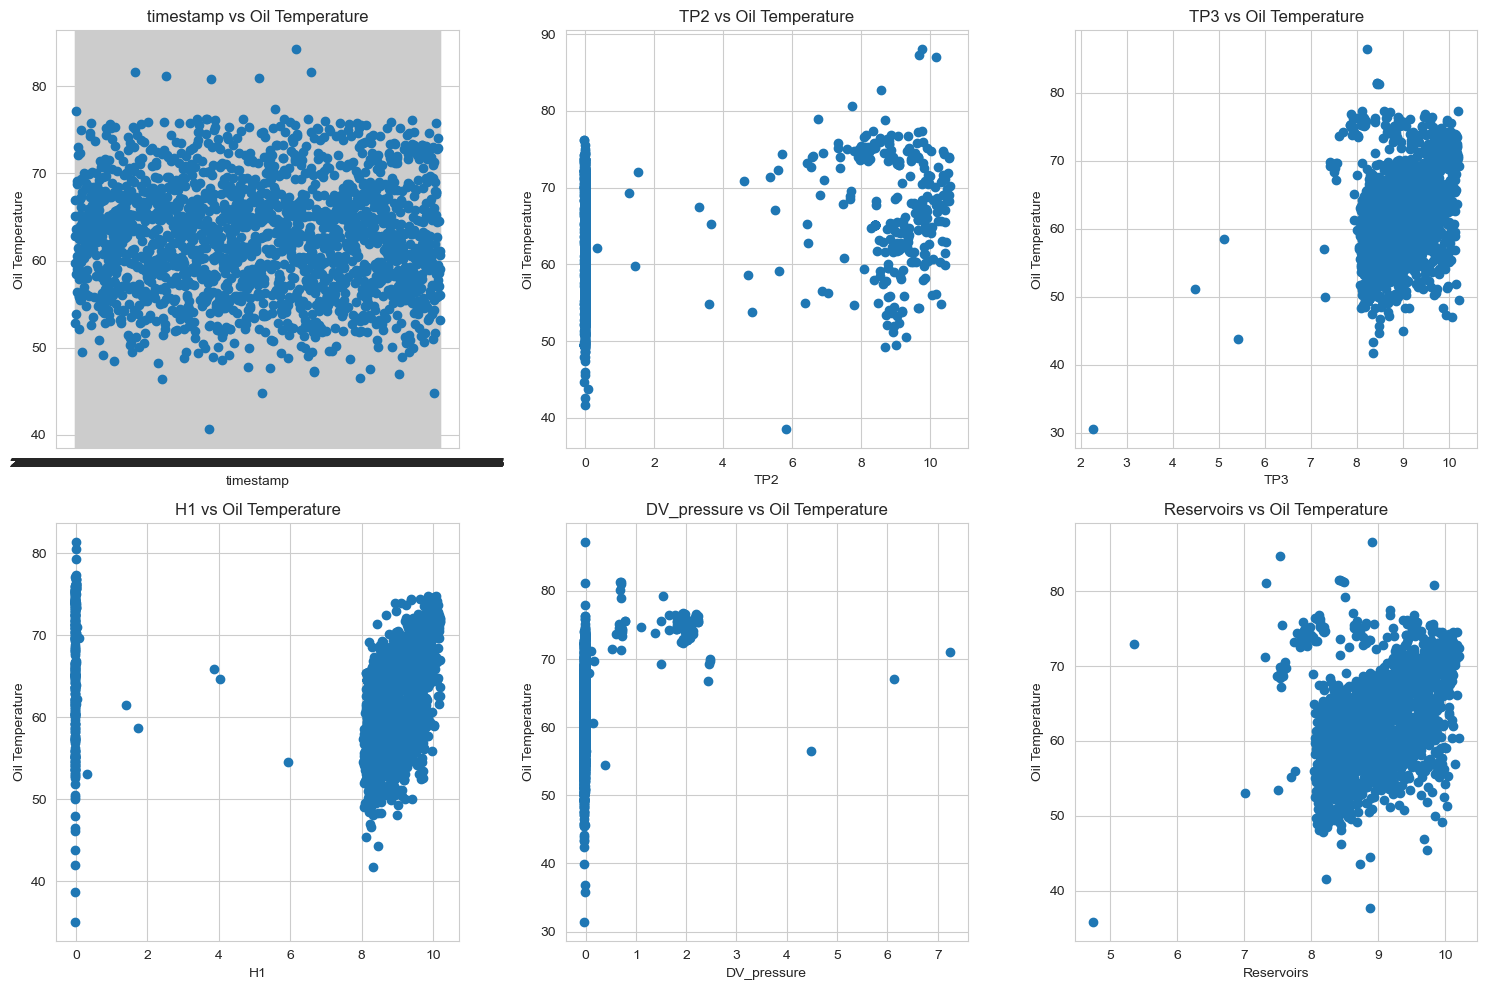

In [14]:
n_rows = 2
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(df.columns[:n_rows * n_cols]):
    if column != 'Oil_temperature':
        sample_size = min(2000, len(df))
        sample_indices = random.sample(range(len(df)), sample_size)
        axes[i].scatter(df.iloc[sample_indices][column], df.iloc[sample_indices]['Oil_temperature'])
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Oil Temperature')
        axes[i].set_title(f'{column} vs Oil Temperature')

for i in range(len(df.columns) - 1, n_rows * n_cols):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

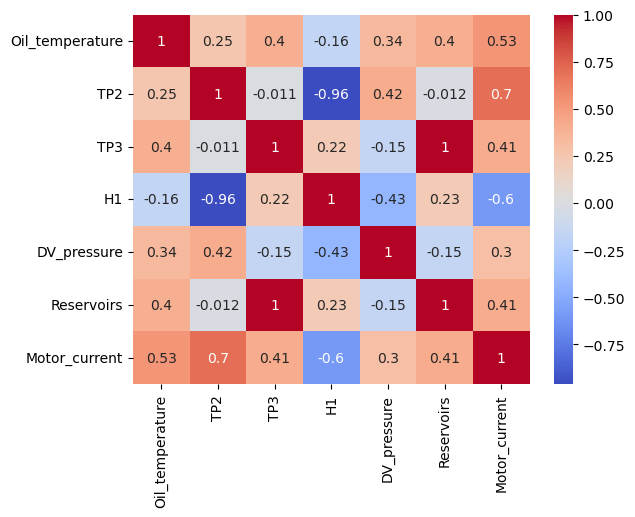

In [7]:
fields = ["Oil_temperature", "TP2", "TP3", "H1", "DV_pressure", "Reservoirs", "Motor_current"]
sns.heatmap(df[fields].corr(), annot=True, cmap="coolwarm")
plt.show()

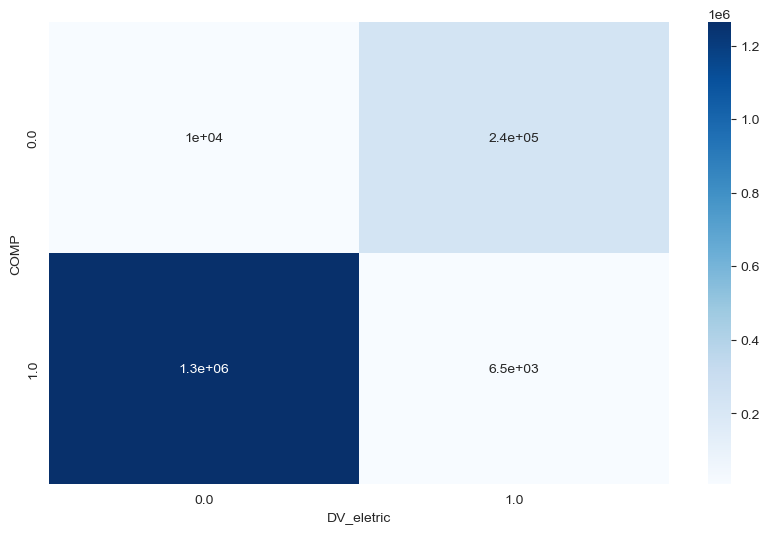

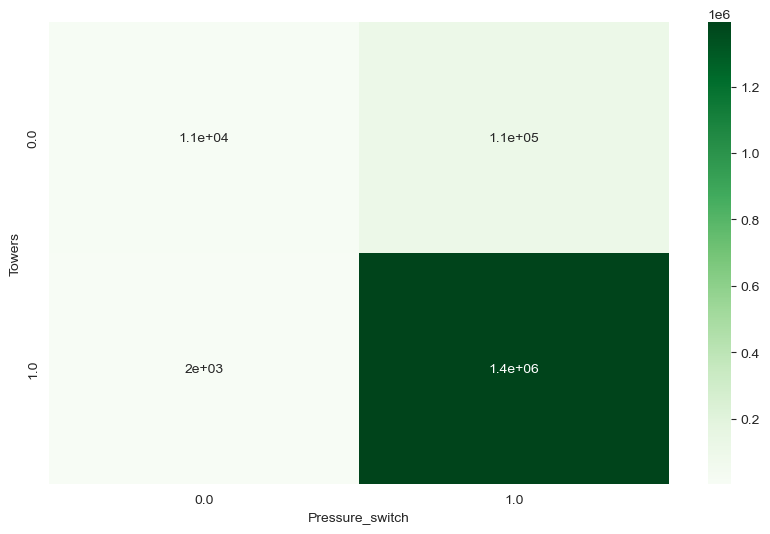

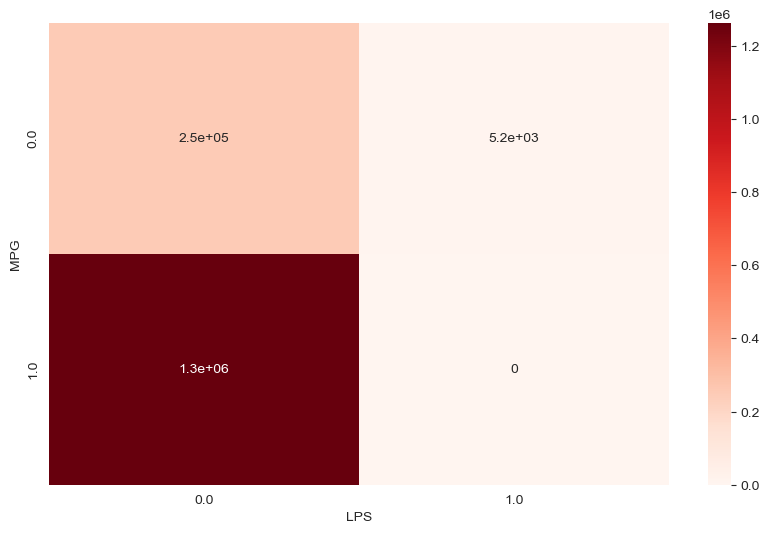

In [15]:
sns.heatmap(pd.crosstab(df["COMP"], df["DV_eletric"]), annot=True, cmap="Blues")
plt.show()
sns.heatmap(pd.crosstab(df["Towers"], df["Pressure_switch"]), annot=True, cmap="Greens")
plt.show()
sns.heatmap(pd.crosstab(df["MPG"], df["LPS"]), annot=True, cmap="Reds")
plt.show()

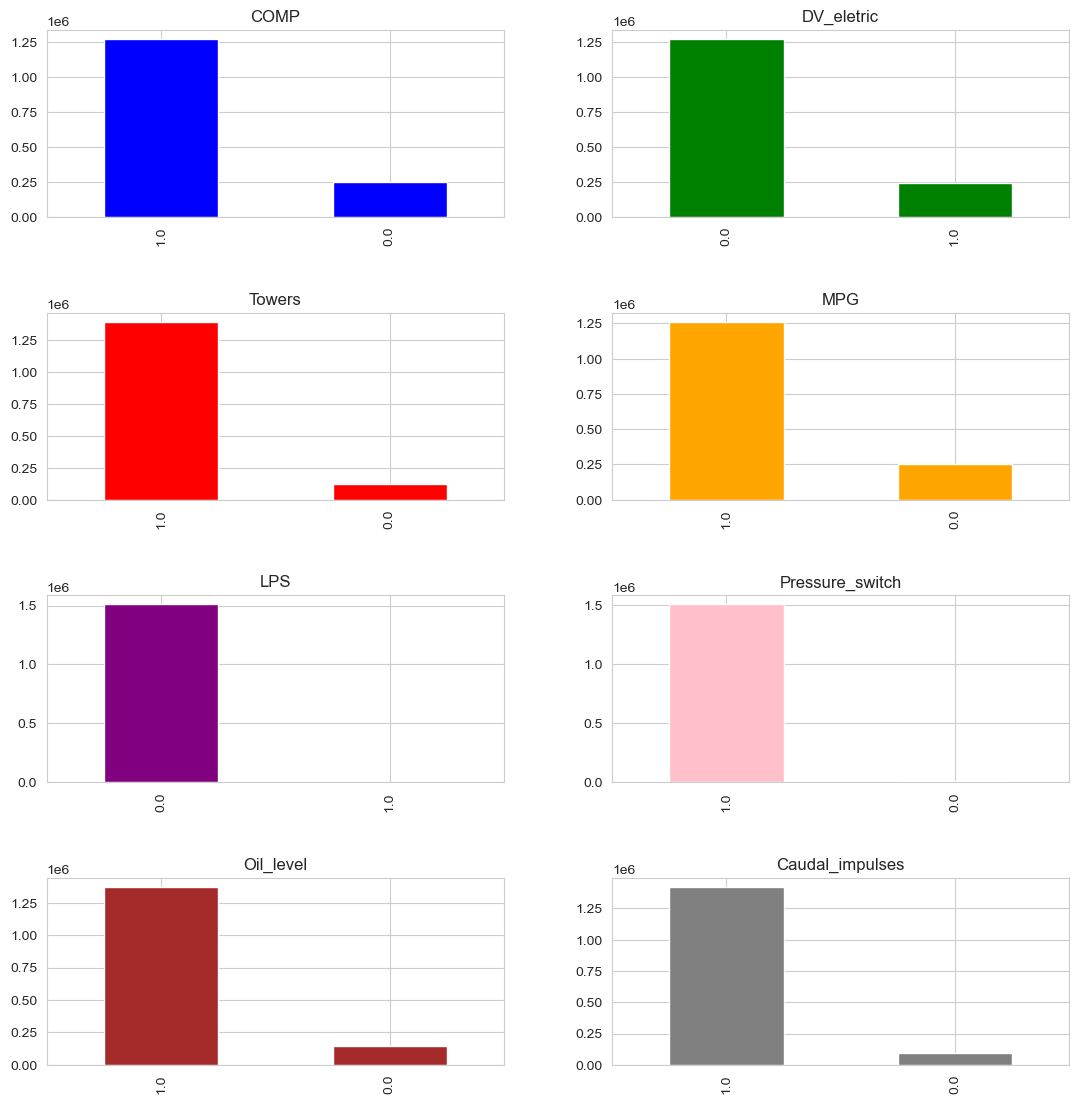

In [16]:
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
fig.tight_layout(pad=5)

axes = axes.flatten()

df["COMP"].value_counts().plot(kind="bar", color="blue", ax=axes[0])
axes[0].set_title("COMP")

df["DV_eletric"].value_counts().plot(kind="bar", color="green", ax=axes[1])
axes[1].set_title("DV_eletric")

df["Towers"].value_counts().plot(kind="bar", color="red", ax=axes[2])
axes[2].set_title("Towers")

df["MPG"].value_counts().plot(kind="bar", color="orange", ax=axes[3])
axes[3].set_title("MPG")

df["LPS"].value_counts().plot(kind="bar", color="purple", ax=axes[4])
axes[4].set_title("LPS")

df["Pressure_switch"].value_counts().plot(kind="bar", color="pink", ax=axes[5])
axes[5].set_title("Pressure_switch")

df["Oil_level"].value_counts().plot(kind="bar", color="brown", ax=axes[6])
axes[6].set_title("Oil_level")

df["Caudal_impulses"].value_counts().plot(kind="bar", color="gray", ax=axes[7])
axes[7].set_title("Caudal_impulses")

plt.show()


Some possible regression problems on your assigned dataset are:

- Predicting TP3 (bar) based on other variables
- Predicting H1 (bar) based on other variables
- Predicting DV pressure (bar) based on other variables
- Predicting Reservoirs (bar) based on other variables
- Predicting Motor Current (A) based on other variables
- Predicting Oil Temperature (ºC) based on other variables

The problem that seems the most interesting to me is predicting Oil Temperature (ºC) based on other variables, because:

- Oil temperature is an important factor that affects the performance and efficiency of the compressor.
- Oil temperature is influenced by both numerical and categorical variables.
- Oil temperature has a non-linear relationship with some of the variables, such as TP2 and TP3.
- Oil temperature has some outliers and noise in the data.

In [17]:
X = df.drop("Oil_temperature", axis=1)
y = df["Oil_temperature"]


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
num_transformer = StandardScaler() 
cat_transformer = OneHotEncoder()

Starting evaluation for Linear Regression...


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

Finished evaluation for Linear Regression. Test RMSE: 4.8350, Test MAE: 3.7786
Starting evaluation for Decision Tree Regression...


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

Finished evaluation for Decision Tree Regression. Test RMSE: 3.8672, Test MAE: 2.8292
Starting evaluation for Random Forest Regression...


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

Finished evaluation for Random Forest Regression. Test RMSE: 4.0108, Test MAE: 2.9869
Summary of the results:
Linear Regression
Best score: -23.50157813771046
Best params: {}
Test score: 4.834983278431834
Test MAE: 3.778550804726877

Decision Tree Regression
Best score: -15.058039283939882
Best params: {'model__max_depth': 6, 'model__min_samples_split': 4}
Test score: 3.8671689388592507
Test MAE: 2.8291566246934625

Random Forest Regression
Best score: -16.118597979194927
Best params: {'model__max_depth': 5, 'model__n_estimators': 33}
Test score: 4.010773818556086
Test MAE: 2.986879266379722



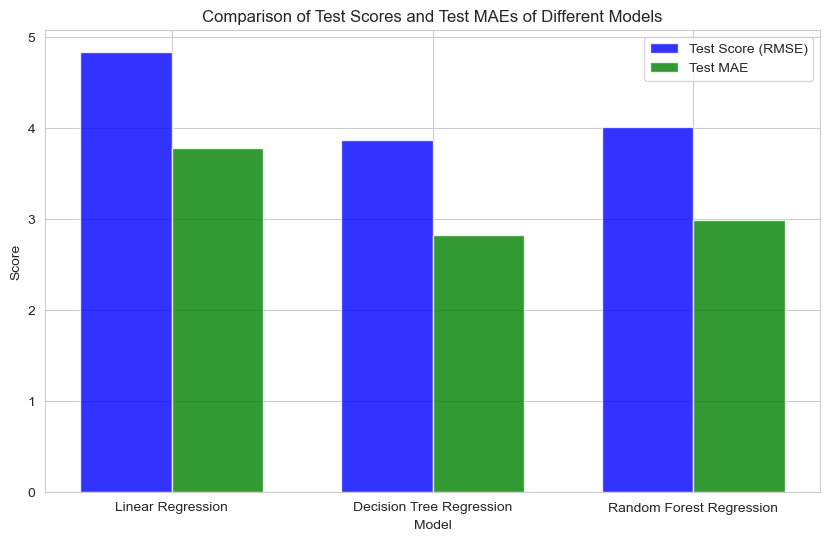

In [24]:

def preprocess_data(df):
    df = df.dropna(subset=["Oil_temperature"])
    X = df.drop("Oil_temperature", axis=1)
    y = df["Oil_temperature"]
    return train_test_split(X, y, test_size=0.2, random_state=42)



def create_preprocessor(num_cols, cat_cols):
    return ColumnTransformer(transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="mean")),
            ("scaler", StandardScaler())
        ]), num_cols),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder())
        ]), cat_cols)
    ])



def create_models_and_params():
    models = {
        "Linear Regression": {
            "model": LinearRegression(),
            "n_iter": 1
        },
        "Decision Tree Regression": {
            "model": DecisionTreeRegressor(),
            "n_iter": 20
        },
        "Random Forest Regression": {
            "model": RandomForestRegressor(),
            "n_iter": 20
        }
    }

    params = {
        "Linear Regression": {},
        "Decision Tree Regression": {
            "model__max_depth": randint(3, 7),
            "model__min_samples_split": randint(2, 7)
        },
        "Random Forest Regression": {
            "model__n_estimators": randint(10, 50),
            "model__max_depth": randint(2, 6)
        }
    }

    return models, params




def evaluate_models(models, params, X_train, y_train, X_test, y_test, preprocessor):
    results = {}
    for model_name, model_info in models.items():
        print(f"Starting evaluation for {model_name}...")

        pipeline = Pipeline(steps=[
            ("preprocessor", preprocessor),
            ("model", model_info["model"])
        ])

        randomized_search = RandomizedSearchCV(pipeline, params[model_name], cv=5, scoring="neg_mean_squared_error", n_iter=model_info["n_iter"], random_state=42)
        randomized_search.fit(X_train, y_train)

        results[model_name] = {
            "best_estimator": randomized_search.best_estimator_,
            "best_score": randomized_search.best_score_,
            "best_params": randomized_search.best_params_,
            "test_score": mean_squared_error(y_test, randomized_search.predict(X_test), squared=False),
            "test_mae": mean_absolute_error(y_test, randomized_search.predict(X_test))
        }

        print(f"Finished evaluation for {model_name}. Test RMSE: {results[model_name]['test_score']:.4f}, Test MAE: {results[model_name]['test_mae']:.4f}")

    return results


def print_results_summary(results):
    print("Summary of the results:")
    for model_name, result in results.items():
        print(f"{model_name}\nBest score: {result['best_score']}\nBest params: {result['best_params']}\nTest score: {result['test_score']}\nTest MAE: {result['test_mae']}\n")


def plot_test_scores_and_maes(results, models):
    import numpy as np
    import matplotlib.pyplot as plt

    test_scores = [result["test_score"] for result in results.values()]
    test_maes = [result["test_mae"] for result in results.values()]

    fig, ax = plt.subplots()
    bar_width = 0.35
    index = np.arange(len(models))
    rects1 = ax.bar(index, test_scores, bar_width, alpha=0.8, color='b', label='Test Score (RMSE)')
    rects2 = ax.bar(index + bar_width, test_maes, bar_width, alpha=0.8, color='g', label='Test MAE')

    ax.set_xlabel('Model')
    ax.set_ylabel('Score')
    ax.set_title('Comparison of Test Scores and Test MAEs of Different Models')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models.keys())
    ax.legend()

    plt.show()


def main(df):
    X_train, X_test, y_train, y_test = preprocess_data(df)
    
    num_cols = ["TP2", "TP3", "H1", "DV_pressure", "Reservoirs", "Motor_current"]
    cat_cols = ["COMP", "DV_eletric", "Towers", "MPG", "LPS", "Pressure_switch", "Oil_level", "Caudal_impulses"]
    preprocessor = create_preprocessor(num_cols, cat_cols)

    models, params = create_models_and_params()
    results = evaluate_models(models, params, X_train, y_train, X_test, y_test, preprocessor)

    print_results_summary(results)
    plot_test_scores_and_maes(results, models)


if __name__ == "__main__":
    main(df)


The results show that the best model for predicting Oil Temperature (ºC) based on other variables is the Decision Tree Regression, with a test score (RMSE) of 3.867 and a test MAE of 2.829. This means that the Decision Tree Regression model has the lowest error and the highest accuracy among the models compared.

The Linear Regression model has the worst performance, with a test score (RMSE) of 4.835 and a test MAE of 3.779. This means that the Linear Regression model has the highest error and the lowest accuracy among the models compared.

The Random Forest Regression model has a slightly better performance than the Linear Regression model, with a test score (RMSE) of 4.011 and a test MAE of 2.987. This means that the Random Forest Regression model has a lower error and a higher accuracy than the Linear Regression model, but still worse than the Decision Tree Regression model.

The reason for these results could be that the Decision Tree Regression model is able to capture the non-linear relationship between the features and the target better than the Linear Regression model, which assumes a linear relationship. The Decision Tree Regression model can also handle the outliers and noise in the data better than the Linear Regression model, which is sensitive to them.


- The mean oil temperature is 62.64°C, with a variance of 42.46°C. This means that the average oil temperature is around 62.64°C, and the oil temperature values are spread out by about 42.46°C from the mean.

- The test score (RMSE) of the Decision Tree Regression model is 3.867, which means that the average difference between the actual and predicted oil temperature values is about 3.867°C. This is much lower than the variance of the oil temperature variable, which means that the model has a high accuracy and a low error.

- The test score (RMSE) of the Linear Regression model is 4.835, which means that the average difference between the actual and predicted oil temperature values is about 4.835°C. This is also lower than the variance of the oil temperature variable, but higher than the Decision Tree Regression model, which means that the model has a lower accuracy and a higher error than the Decision Tree Regression model.

- The test score (RMSE) of the Random Forest Regression model is 4.011, which means that the average difference between the actual and predicted oil temperature values is about 4.011°C. This is also lower than the variance of the oil temperature variable, but higher than the Decision Tree Regression model and lower than the Linear Regression model, which means that the model has a moderate accuracy and a moderate error compared to the other models.